In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

## Tehnici de regularizare

### Regularizarea - intuiție

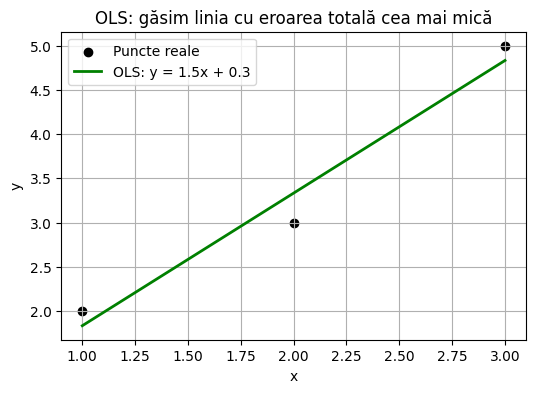

In [2]:
# Datele noastre
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

# Funcția noastră
# y = m * x + n

# Calculează linia optimă (OLS)
m = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
n = y.mean() - m * x.mean()
y_pred_ols = m * x + n

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="black", label="Puncte reale")
plt.plot(x, y_pred_ols, "-", color="green", linewidth=2, label=f"OLS: y = {m:.1f}x + {n:.1f}")

# Adăugăm text explicativ
plt.title("OLS: găsim linia cu eroarea totală cea mai mică")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


#### Dar dacă setul de test arată așa? Modelul va fi prea generalist pe datele de training

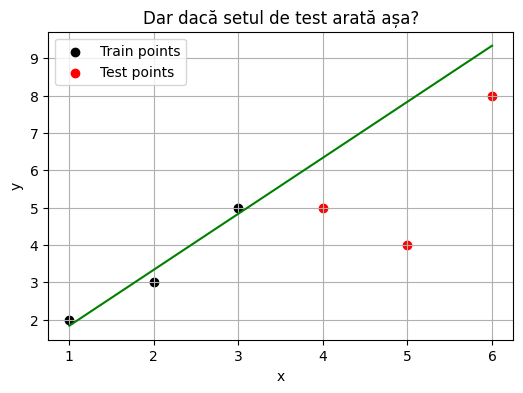

In [3]:
# Datele de test — schimbăm ușor distribuția (ex: valori mai mari și zgomot diferit)
x_test = np.array([4, 5, 6])
y_test = np.array([5, 4, 8])   # nu mai urmează exact trendul inițial

# Predicția pe test
y_pred_test = m * x_test + n

# Plotăm totul
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="black", label="Train points")
plt.scatter(x_test, y_test, color="red", label="Test points")
plt.plot(np.concatenate([x, x_test]),
         np.concatenate([m * np.concatenate([x, x_test]) + n]),
         "-", color="green") # linewidth=2, label=f"OLS (train)  y={m:.1f}x+{n:.1f}")

plt.title("Dar dacă setul de test arată așa?")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

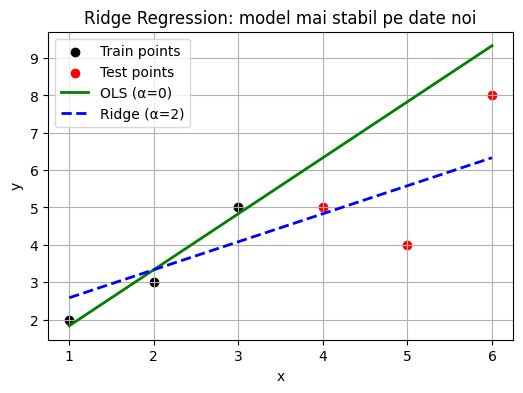

Coeficient OLS:  1.500
Coeficient Ridge: 0.750


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Datele de antrenare
x_train = np.array([1, 2, 3]).reshape(-1, 1)
y_train = np.array([2, 3, 5])

# Datele de test (puțin diferite)
x_test = np.array([4, 5, 6]).reshape(-1, 1)
y_test = np.array([5, 4, 8])

# Model OLS (alpha = 0)
ridge_ols = Ridge(alpha=0)
ridge_ols.fit(x_train, y_train)
y_pred_ols = ridge_ols.predict(np.concatenate([x_train, x_test]))

# Model Ridge cu regularizare
ridge_reg = Ridge(alpha=2.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(np.concatenate([x_train, x_test]))

# Plotăm
x_all = np.concatenate([x_train, x_test])

plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color="black", label="Train points")
plt.scatter(x_test, y_test, color="red", label="Test points")
plt.plot(x_all, y_pred_ols, "-", color="green", linewidth=2, label="OLS (α=0)")
plt.plot(x_all, y_pred_ridge, "--", color="blue", linewidth=2, label="Ridge (α=2)")

plt.title("Ridge Regression: model mai stabil pe date noi")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficient OLS:  {ridge_ols.coef_[0]:.3f}")
print(f"Coeficient Ridge: {ridge_reg.coef_[0]:.3f}")
